In [1]:
import io
from IPython.nbformat import current
def execute_notebook(nbfile):
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("/cellar/users/ramarty/Projects/hla_ii/bin/imports.ipynb")
execute_notebook("/cellar/users/ramarty/Projects/hla_ii/bin/gathering_affinities.ipynb")

/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/IPython/nbformat/current.py:19: UserWarning: IPython.nbformat.current is deprecated.

- use IPython.nbformat for read/write/validate public API
- use IPython.nbformat.vX directly to composing notebooks of a particular version

  """)
/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


In [95]:
tissues_to_use = [x.strip() for x in open('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/tissues_to_use.txt')]

Use pre-made dataframe and just add alternate patients <br>
Would like to also compare with MHC-II

In [70]:
df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/mhc_diversity/dataframe.csv',
                index_col=0)

In [71]:
patient_mutations = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_mutations.cancer.TCGA.conservative.mut.csv',
                                index_col=0)
frequent_mutations = list(patient_mutations.sum().sort_values()[patient_mutations.sum().sort_values() >= 0].index)
print len(frequent_mutations)

1018


In [87]:
classI_alt = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_affinities.cancer.all.alternate.classI.csv',
                     index_col=0)
classII_alt = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_affinities.cancer.all.alternate.csv',
                     index_col=0)
#classI_alt = pd.concat([pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_affinities.cancer.all.alternate.classI.csv',
#                     index_col=0),
#                        pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_affinities.cancer.all.SRA.classI.csv',
#                     index_col=0)])
#classII_alt = pd.concat([pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_affinities.cancer.all.alternate.csv',
#                     index_col=0),
#                       pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_affinities.cancer.all.SRA.csv',
#                     index_col=0)])
classI_alt = classI_alt[frequent_mutations]
classII_alt = classII_alt[frequent_mutations]
tmp1 = pd.DataFrame(sum(classI_alt < 2, axis=1) / len(frequent_mutations) )
tmp1.columns = ['classI']
tmp2 = pd.DataFrame(sum(classII_alt < 10, axis=1) / len(frequent_mutations) )
tmp2.columns = ['classII']
print len(tmp1), len(tmp2)
df_alt = pd.merge(tmp1, tmp2, left_index=True, right_index=True, how='outer')

553 629


In [88]:
def remove_srr(x):
    return x[3:]
classI_alt.index = pd.Series(classI_alt.index).apply(remove_srr)
classII_alt.index = pd.Series(classII_alt.index).apply(remove_srr)

In [89]:
clinical = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/clinical/aric_esp_cancer.txt',
                     sep='\t')
clinical = clinical.dropna()

In [90]:
clinical.IID = clinical.IID.astype(int)
clinical.IID = clinical.IID.astype(str)

In [91]:
clinical.head()

,FID,IID,dbgap_id,ESP_race_selfreport,ESP_sex_selfreport,ESP_age_baseline,ESP_bmi_baseline,cancer
0,0.0,173901,222831,African American,Male,61,34.04311,0
1,0.0,305065,222850,European American,Female,54,34.69081,-9
2,0.0,572973,222894,European American,Female,48,23.96873,0
3,0.0,454993,222898,African American,Female,52,32.44822,0
4,0.0,210936,222904,African American,Female,57,35.84078,0


In [100]:
[x for x in clinical.IID if x in classII_alt.index]

['341812']

In [98]:
sort(classII_alt.index)

array(['1034682', '1034704', '1034717', '1034730', '1034743', '1034765',
       '1034870', '1034883', '1034927', '1034940', '1034984', '1035006',
       '1035019', '1035032', '1035045', '1035067', '1035090', '201049',
       '201052', '201055', '201058', '201063', '201067', '201071',
       '201073', '201078', '201100', '201102', '201104', '201106',
       '341285', '341287', '341289', '341294', '341299', '341303',
       '341305', '341307', '341309', '341313', '341322', '341326',
       '341328', '341330', '341332', '341336', '341338', '341340',
       '341342', '341344', '341348', '341350', '341353', '341355',
       '341357', '341359', '341361', '341363', '341365', '341367',
       '341369', '341371', '341375', '341377', '341379', '341381',
       '341383', '341387', '341389', '341391', '341395', '341397',
       '341399', '341403', '341405', '341407', '341409', '341413',
       '341417', '341421', '341423', '341425', '341427', '341726',
       '341728', '341731', '341733', '341735'

In [99]:
sort(clinical.IID)

array(['100056', '100104', '100193', '100960', '102105', '103431',
       '103937', '104482', '105061', '105841', '105843', '106181',
       '107054', '107469', '108018', '111586', '112526', '112796',
       '113283', '113580', '114735', '114754', '114890', '115444',
       '116341', '116341', '116341', '116341', '116341', '116341',
       '116341', '117230', '117905', '119099', '119265', '119407',
       '119971', '119974', '120998', '121394', '121504', '121802',
       '122832', '125047', '125140', '125565', '125720', '125990',
       '126119', '126185', '126858', '126858', '126858', '126858',
       '126858', '128327', '128378', '129176', '129572', '129572',
       '130632', '131717', '131964', '132084', '132169', '132729',
       '132889', '132976', '134328', '135834', '136105', '137892',
       '139525', '140061', '140573', '140573', '140573', '140573',
       '140799', '141196', '141427', '142268', '142278', '142517',
       '143097', '143125', '143736', '144439', '145516', '1455

In [80]:
df_alt.to_csv('/cellar/users/ramarty/Data/hla_ii/hla_types/hla_types.alternate.all.csv')

In [81]:
df_alt.head()

,classI,classII
SRR309340,0.444008,NaN
SRR309344,0.470530,0.311395
SRR309346,0.537328,0.335953
SRR309348,0.544204,NaN
SRR309352,0.443026,0.297642


In [82]:
df.head()

,classI,classII,Tissue,Age,Race,homozygous_classI,homozygous_classII,homozygous_total,passenger_coverageI,passenger_coverageII,classI_cat,classII_cat,classI_het,classII_het
TCGA-DH-A7UV,0.494106,0.306483,LGG,49.0,WHITE,1.0,3.0,4.0,0.536184,0.341009,other,other,other,homo
TCGA-DH-A7UT,0.554028,0.320236,LGG,30.0,WHITE,1.0,1.0,2.0,0.530702,0.384868,high,other,other,het
TCGA-DH-A7UR,0.501965,0.310413,LGG,59.0,WHITE,0.0,0.0,0.0,0.514254,0.360746,other,other,het,het
TCGA-DH-A7US,0.441061,0.332024,LGG,50.0,WHITE,0.0,2.0,2.0,0.527412,0.382675,low,high,het,het
TCGA-DD-A4NB,0.482318,0.321218,LIHC,25.0,WHITE,0.0,0.0,0.0,0.493421,0.378289,low,other,het,het


In [83]:
df['cancer'] = 'yes'
df_alt['cancer'] = 'no'
df_all = pd.concat([df, df_alt])

With Cancer: 0.520628683694 5786
Without Cancer: 0.518664047151 833
MannwhitneyuResult(statistic=2397096.0, pvalue=0.40218175063678324)


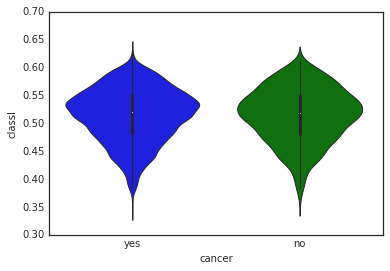

In [84]:
print "With Cancer:", df_all[df_all.cancer == 'yes'].classI.median(), len(df_all[df_all.cancer == 'yes'].classI)
print "Without Cancer:", df_all[df_all.cancer == 'no'].classI.median(), len(df_all[df_all.cancer == 'no'].classI)
print sp.mannwhitneyu(df_all[df_all.cancer == 'yes'].classI.dropna(),
                df_all[df_all.cancer == 'no'].classI.dropna())
sns.violinplot(x='cancer', y='classI', data=df_all)

With Cancer: 0.315617196716 5786
Without Cancer: 0.313734141387 833
Ttest_indResult(statistic=2.5547762371710272, pvalue=0.010648639974378456)


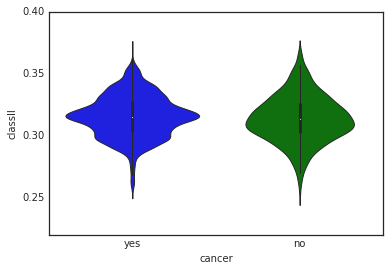

In [86]:
print "With Cancer:", df_all[df_all.cancer == 'yes'].classII.mean(), len(df_all[df_all.cancer == 'yes'].classII)
print "Without Cancer:", df_all[df_all.cancer == 'no'].classII.mean(), len(df_all[df_all.cancer == 'no'].classII)
print sp.ttest_ind(df_all[df_all.cancer == 'yes'].classII.dropna(),
                df_all[df_all.cancer == 'no'].classII.dropna())
sns.violinplot(x='cancer', y='classII', data=df_all)

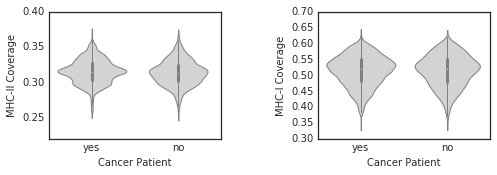

In [157]:
fig = plt.figure(figsize=(7, 2.5)) 
ax1 = plt.subplot2grid((1, 11), (0, 0), colspan=5)
sns.violinplot(x='cancer', y='classII', data=df_all,
              color='lightgrey')
plt.xlabel('Cancer Patient')
plt.ylabel('MHC-II Coverage')
plt.tight_layout()

ax2 = plt.subplot2grid((1, 11), (0, 6), colspan=5)
sns.violinplot(x='cancer', y='classI', data=df_all,
              color='lightgrey')
plt.xlabel('Cancer Patient')
plt.ylabel('MHC-I Coverage')
plt.tight_layout()

plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/mhc_diversity/susceptibility.non_cancer.pdf')

In [158]:
white_df = df_all[~df_all.Race.isin(list(df_all.Race.value_counts().index[1:]))]
print np.mean(df_all[df_all.cancer == 'yes'].classI), np.mean(df_all[df_all.cancer == 'no'].classI)
print np.mean(white_df[white_df.cancer == 'yes'].classI), np.mean(df_all[df_all.cancer == 'no'].classI)

print np.mean(df_all[df_all.cancer == 'yes'].classII), np.mean(df_all[df_all.cancer == 'no'].classII)
print np.mean(white_df[white_df.cancer == 'yes'].classII), np.mean(df_all[df_all.cancer == 'no'].classII)

0.514879422385 0.514382528626
0.516402733394 0.514382528626
0.315617196716 0.313775341636
0.31581901563 0.313775341636


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

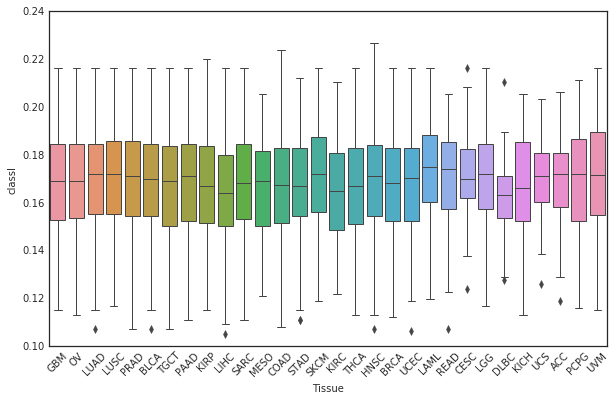

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Tissue', y='classI', data=df)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

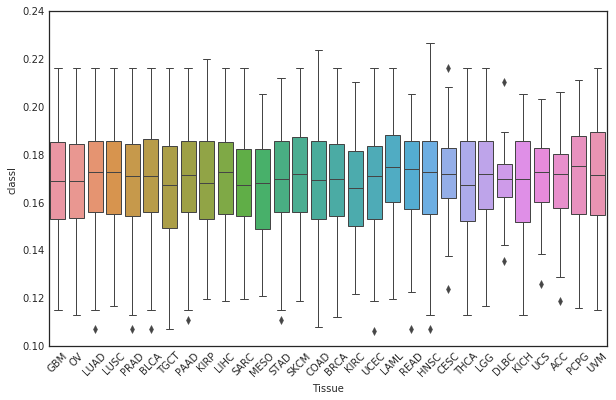

In [43]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Tissue', y='classI', data=white_df)
plt.xticks(rotation=45)

In [45]:
white_df.head()

,Age,Race,Tissue,cancer,classI,classII,classII_cat,classII_het,classI_cat,classI_het,homozygous_classI,homozygous_classII,homozygous_total
TCGA-02-0003,50.0,WHITE,GBM,yes,0.169941,0.073674,other,homo,other,homo,0.0,1.0,1.0
TCGA-02-0033,54.0,WHITE,GBM,yes,0.184676,0.066798,other,homo,high,homo,0.0,2.0,2.0
TCGA-02-0047,78.0,WHITE,GBM,yes,0.120825,0.085462,high,homo,low,het,2.0,1.0,3.0
TCGA-02-0055,62.0,WHITE,GBM,yes,0.152259,0.066798,other,homo,low,homo,0.0,2.0,2.0
TCGA-02-2466,61.0,WHITE,GBM,yes,0.181729,0.075639,other,homo,other,homo,0.0,1.0,1.0


In [46]:
for tissue in df_all.Tissue.unique():
    print tissue, sp.mannwhitneyu(white_df[white_df.Tissue == tissue].classI, 
                                  white_df[white_df.cancer == 'no'].classI)

GBM MannwhitneyuResult(statistic=74921.0, pvalue=0.3184833024511956)
OV MannwhitneyuResult(statistic=81690.0, pvalue=0.232904475463729)
LUAD MannwhitneyuResult(statistic=108315.0, pvalue=0.21457037160753134)
LUSC MannwhitneyuResult(statistic=96493.0, pvalue=0.20451986012902629)
PRAD MannwhitneyuResult(statistic=107612.0, pvalue=0.49643513308660198)
BLCA MannwhitneyuResult(statistic=74209.0, pvalue=0.24303896819801979)
TGCT MannwhitneyuResult(statistic=27340.0, pvalue=0.083140740163994975)
PAAD MannwhitneyuResult(statistic=34556.0, pvalue=0.36245650778250793)
KIRP MannwhitneyuResult(statistic=47370.0, pvalue=0.49466307921967251)
LIHC MannwhitneyuResult(statistic=40260.0, pvalue=0.25473153070766463)
SARC MannwhitneyuResult(statistic=32525.0, pvalue=0.19490728205406632)
MESO MannwhitneyuResult(statistic=16443.0, pvalue=0.15239251154573902)
COAD MannwhitneyuResult(statistic=71184.0, pvalue=0.34147630570067755)
STAD MannwhitneyuResult(statistic=72687.0, pvalue=0.33810150092390057)
SKCM Mann

In [47]:
for tissue in df_all.Tissue.unique():
    print tissue, sp.mannwhitneyu(white_df[white_df.Tissue == tissue].classII, 
                                  white_df[white_df.cancer == 'no'].classII)

GBM MannwhitneyuResult(statistic=74622.0, pvalue=0.28556244775669615)
OV MannwhitneyuResult(statistic=42990.0, pvalue=4.4494485943378425e-34)
LUAD MannwhitneyuResult(statistic=109761.0, pvalue=0.32763986904367265)
LUSC MannwhitneyuResult(statistic=86750.0, pvalue=0.00039751795250730882)
PRAD MannwhitneyuResult(statistic=99281.0, pvalue=0.020234726587251482)
BLCA MannwhitneyuResult(statistic=74268.0, pvalue=0.24885524069241466)
TGCT MannwhitneyuResult(statistic=29313.0, pvalue=0.41393270007530414)
PAAD MannwhitneyuResult(statistic=33850.0, pvalue=0.23347555670919451)
KIRP MannwhitneyuResult(statistic=42173.0, pvalue=0.010907539425672776)
LIHC MannwhitneyuResult(statistic=41556.0, pvalue=0.48371185086473834)
SARC MannwhitneyuResult(statistic=0.0, pvalue=8.9801764630337276e-77)
MESO MannwhitneyuResult(statistic=16973.0, pvalue=0.2741007433107)
COAD MannwhitneyuResult(statistic=61841.0, pvalue=0.00025857035357804186)
STAD MannwhitneyuResult(statistic=70730.0, pvalue=0.14691431422595952)
SK

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

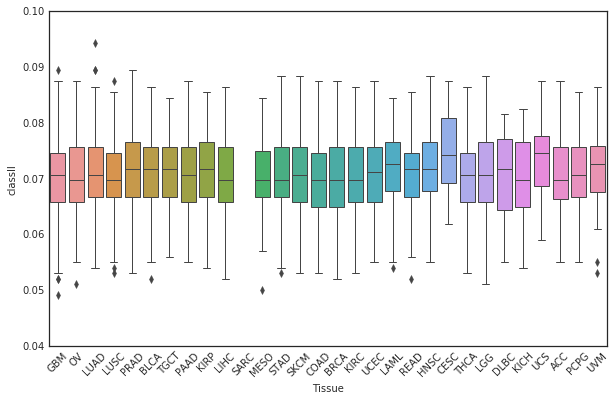

In [48]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Tissue', y='classII', data=white_df)
plt.xticks(rotation=45)